### MOMP supports two operational modes:
1. **Production mode**: Executed via the CLI for standard workflows and automated pipelines.
2. **Research mode**: Accessible as an importable Python module, enabling interactive experimentation, analysis, and integration within Python scripts or Jupyter notebooks.

### Run MOMP in **production mode**  
With user-defined `config.in`, the main benchmarking workflow is executed via CLI:               

`momp-run`

Typical steps performed:
1. Load configuration
2. Set up benchmarking cases
3. Read model and observation data
4. Detect monsoon onset
5. Evaluate model against reference data
6. Generate benchmarking metrics
7. Save NetCDF outputs and figures
8. Make metric plots


### Run MOMP in **Research mode**  
#### Option 1. run MOMP as a python module

In [1]:
!python -m MOMP.app.onset_time_series

package base dir /Users/bodong/Code/benchmarking/MOMP
config_file: /Users/bodong/Code/benchmarking/MOMP/params/config.in

Processing year 2013
Loading observation rainfall from: /Users/bodong/Code/dev_tmp/4x4/obs/2013.nc
Using 06-02 as start date for onset detection
Figure(800x300)


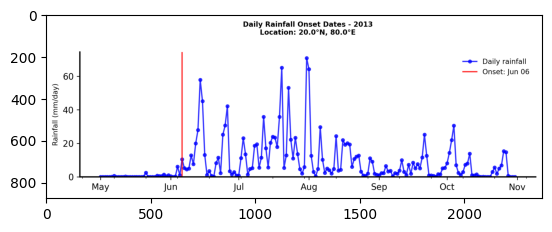

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image from file
img = mpimg.imread('/Users/bodong/Code/benchmarking/MOMP/figure/onset_time_series.png')  # supports PNG, JPG, etc.
plt.imshow(img)

#### Sensitivity of wet_spell to monsoon onset  
change default wet spell days from 5 to 2

In [7]:
!python -m MOMP.app.onset_time_series --wet_spell 2

package base dir /Users/bodong/Code/benchmarking/MOMP
config_file: /Users/bodong/Code/benchmarking/MOMP/params/config.in

Processing year 2013
Loading observation rainfall from: /Users/bodong/Code/dev_tmp/4x4/obs/2013.nc
Using 06-02 as start date for onset detection
Figure(800x300)


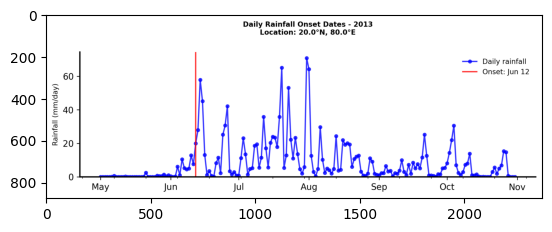

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image from file
img = mpimg.imread('/Users/bodong/Code/benchmarking/MOMP/figure/onset_time_series.png')  # supports PNG, JPG, etc.
plt.imshow(img)

### Option2. import MOMP as a python package

In [27]:
import importlib
import MOMP.lib.parser as pars
importlib.reload(pars)
import MOMP.lib.loader as loader
importlib.reload(loader)
from MOMP.app.onset_time_series import obs_onset_analysis

package base dir /Users/bodong/Code/benchmarking/MOMP
config_file: /Users/bodong/Code/benchmarking/MOMP/params/config.in


In [28]:
import MOMP.app.onset_time_series as ons

In [30]:
ons.cfg

{'importlib': <module 'importlib' from '/opt/anaconda3/lib/python3.13/importlib/__init__.py'>,
 'os': <module 'os' from '/opt/anaconda3/lib/python3.13/os.py'>,
 'package': 'MOMP',
 'base_dir': PosixPath('/Users/bodong/Code/benchmarking/MOMP'),
 'config_file': PosixPath('/Users/bodong/Code/benchmarking/MOMP/params/config.in'),
 'project_name': 'test MOMP run with sample data',
 'layout': ('model', 'verification_window'),
 'model_list': ('AIFS',),
 'obs': 'IMD',
 'obs_dir': '/Users/bodong/Code/dev_tmp/4x4/obs',
 'obs_file_pattern': ('{}.nc', 'data_{}.nc'),
 'obs_var': 'RAINFALL',
 'obs_unit_cvt': None,
 'ref_model': 'climatology',
 'ref_model_dir': '/Users/bodong/Code/dev_tmp/4x4/obs',
 'ref_model_file_pattern': ('{}.nc', 'data_{}.nc'),
 'ref_model_var': 'RAINFALL',
 'ref_model_unit_cvt': None,
 'model_dir_list': ('/Users/bodong/Code/dev_tmp/4x4/aifs',),
 'model_var_list': ('tp', 'tp'),
 'unit_cvt_list': (None, None),
 'file_pattern_list': ('{}.nc', '{}.nc'),
 'region': 'India',
 'thresh


Processing year 2013
Loading observation rainfall from: /Users/bodong/Code/dev_tmp/4x4/obs/2013.nc
Using 06-02 as start date for onset detection


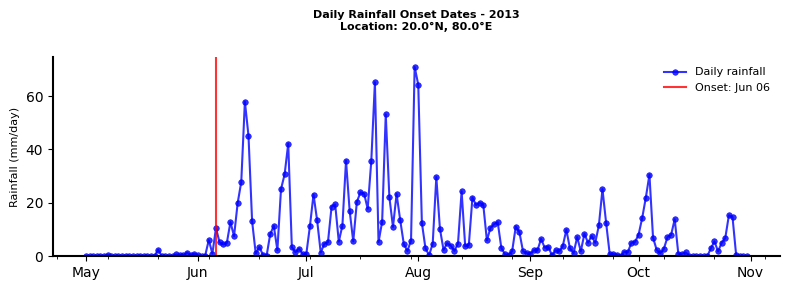

In [31]:
ons.obs_onset_analysis(year=2013, **ons.cfg)